#### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read Dataset

In [2]:
dataset = pd.read_csv('dataset/caracteristics.csv', encoding='latin1')
dataset.head()

c:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590


#### Data Pre-processing

In [3]:
# checking each attribute's data type

dataset.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com        float64
adr         object
gps         object
lat        float64
long        object
dep          int64
dtype: object

In [4]:
# Find out the sum of null value

dataset.columns[dataset.isna().sum() != 0]

Index(['atm', 'col', 'com', 'adr', 'gps', 'lat', 'long'], dtype='object')

In [5]:
# change value in 'lum' attribute to easier word

dataset['lum'] = dataset['lum'].astype(str) 
dataset['lum'] = dataset['lum'].replace({'1': 'Full day', '2': 'Twilight or dawn', '3': 'Night no public lighting', 
                                        '4': 'Night lighting not lit', '5': 'Night with public lighting on'})

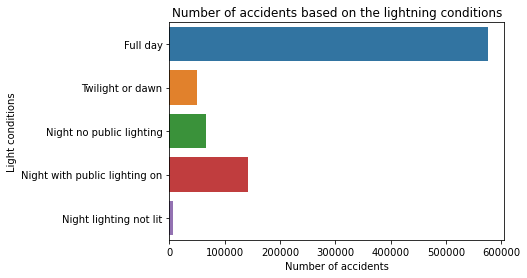

In [6]:
# Attribute 'lum' visualization

plt.clf()
ax = sns.countplot(y = 'lum', data=dataset)
ax.set_title('Number of accidents based on the lightning conditions')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Light conditions')
plt.show()

In [7]:
# changing 'hr' attribute value to hour without minute

dataset['hr'] = dataset['hrmn']/100
dataset['hr'] = dataset['hr'].astype('int64')
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590,14
1,201600000002,16,3,16,1800,Full day,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590,18
2,201600000003,16,7,13,1900,Full day,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590,19
4,201600000005,16,12,23,1100,Full day,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590,11


<Figure size 432x288 with 0 Axes>

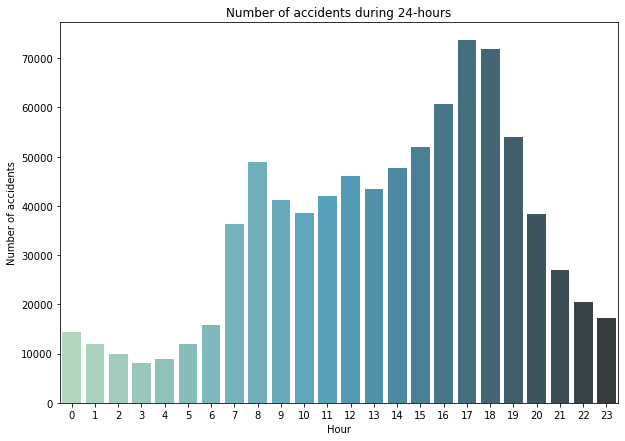

In [8]:
# Attribute 'hr' visualization

plt.clf()
plt.figure(figsize=(10,7))
ax = sns.countplot(x='hr', data=dataset, palette="GnBu_d")
ax.set_title('Number of accidents during 24-hours')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of accidents')
plt.show()

In [9]:
# change accident location
int_dict = {
    '1': 'Out of intersection',
    '2': 'X intersection',
    '3': 'T intersection',
    '4': 'Y intersection',
    '5': 'More than 4 branches intersection',
    '6': 'Giratory',
    '7': 'Place',
    '8': 'Level crossing',
    '9': 'Other'
}

dataset['int'] = dataset['int'].astype(str) 
dataset['int'] = dataset['int'].replace(int_dict)
dataset['int'] = pd.Categorical(dataset['int'], list(int_dict.values()))
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,Out of intersection,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590,14
1,201600000002,16,3,16,1800,Full day,2,Giratory,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590,18
2,201600000003,16,7,13,1900,Full day,1,Out of intersection,1.0,6.0,11.0,NaN,M,0.0,0.0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,Out of intersection,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590,19
4,201600000005,16,12,23,1100,Full day,2,T intersection,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590,11


<Figure size 432x288 with 0 Axes>

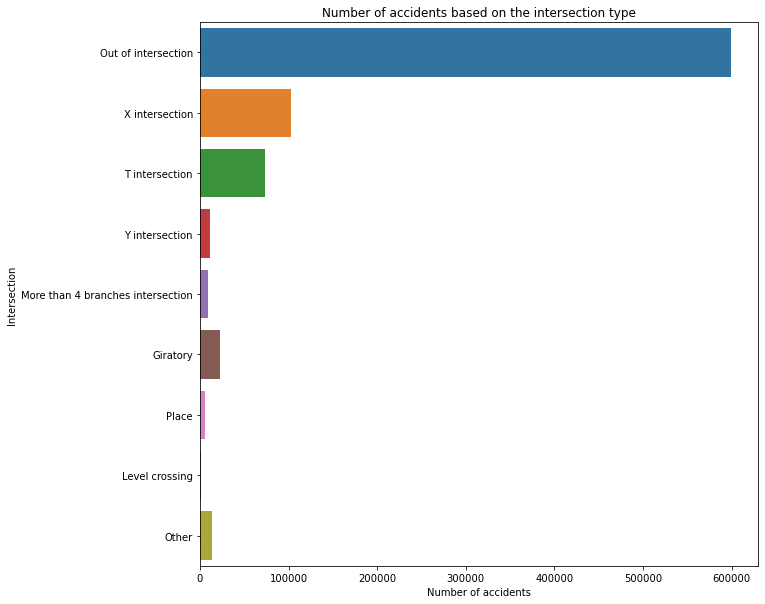

In [10]:
# Attribute 'int' visualization

plt.clf()
plt.figure(figsize=(10,10))
ax = sns.countplot(y = 'int', data=dataset)
ax.set_title('Number of accidents based on the intersection type')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Intersection')
plt.show()

In [11]:
# change 'atm' attribute data type from 'float64' to 'int64'

dataset["atm"] = dataset["atm"].astype("Int64")
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,Out of intersection,8,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590,14
1,201600000002,16,3,16,1800,Full day,2,Giratory,1,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590,18
2,201600000003,16,7,13,1900,Full day,1,Out of intersection,1,6.0,11.0,NaN,M,0.0,0.0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,Out of intersection,7,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590,19
4,201600000005,16,12,23,1100,Full day,2,T intersection,1,3.0,11.0,rue Joliot curie,M,0.0,0.0,590,11


In [12]:
wheater_dict = {
    '1': 'Normal',
    '2': 'Light rain',
    '3': 'Heavy rain',
    '4': 'Snow - hail',
    '5': 'Fog - smoke',
    '6': 'Strong wind - storm',
    '7': 'Dazzling weather',
    '8': 'Cloudy weather',
    '9': 'Other'
}

dataset['atm'] = dataset['atm'].astype(str) 
dataset['atm'] = dataset['atm'].replace(wheater_dict)
dataset['atm'] = pd.Categorical(dataset['atm'], list(wheater_dict.values()))
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,Out of intersection,Cloudy weather,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590,14
1,201600000002,16,3,16,1800,Full day,2,Giratory,Normal,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590,18
2,201600000003,16,7,13,1900,Full day,1,Out of intersection,Normal,6.0,11.0,NaN,M,0.0,0.0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,Out of intersection,Dazzling weather,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590,19
4,201600000005,16,12,23,1100,Full day,2,T intersection,Normal,3.0,11.0,rue Joliot curie,M,0.0,0.0,590,11


<Figure size 432x288 with 0 Axes>

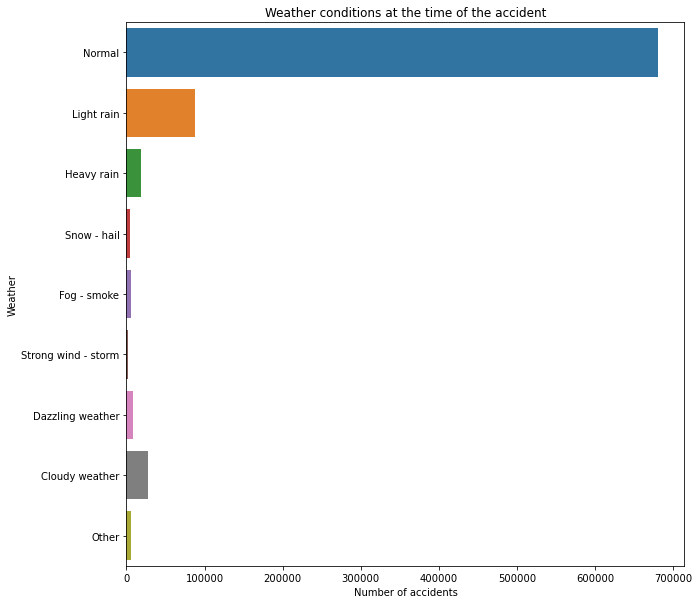

In [13]:
# Attribute 'atm' visualization

plt.clf()
plt.figure(figsize=(10,10))
ax = sns.countplot(y = 'atm', data=dataset)
ax.set_title('Weather conditions at the time of the accident')
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Weather')
plt.show()

In [14]:
# change 'col' attribute data type from 'float64' to 'int64'

dataset["col"] = dataset["col"].astype("Int64")
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,Out of intersection,Cloudy weather,3,5.0,"46, rue Sonneville",M,0.0,0.0,590,14
1,201600000002,16,3,16,1800,Full day,2,Giratory,Normal,6,5.0,1a rue du cimetière,M,0.0,0.0,590,18
2,201600000003,16,7,13,1900,Full day,1,Out of intersection,Normal,6,11.0,NaN,M,0.0,0.0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,Out of intersection,Dazzling weather,3,477.0,52 rue victor hugo,M,0.0,0.0,590,19
4,201600000005,16,12,23,1100,Full day,2,T intersection,Normal,3,11.0,rue Joliot curie,M,0.0,0.0,590,11


In [15]:
collision_dict = {
    '1': 'Two vehicles - frontal',
    '2': 'Two vehicles - from the rear',
    '3': 'Two vehicles - by the side',
    '4': 'Three vehicles and more - in chain',
    '5': 'Three or more vehicles - multiple collisions',
    '6': 'Other collision',
    '7': 'Without collision'
}

dataset['col'] = dataset['col'].astype(str) 
dataset['col'] = dataset['col'].replace(collision_dict)
dataset['col'] = pd.Categorical(dataset['col'], list(collision_dict.values()))
dataset.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,hr
0,201600000001,16,2,1,1445,Full day,2,Out of intersection,Cloudy weather,Two vehicles - by the side,5.0,"46, rue Sonneville",M,0.0,0.0,590,14
1,201600000002,16,3,16,1800,Full day,2,Giratory,Normal,Other collision,5.0,1a rue du cimetière,M,0.0,0.0,590,18
2,201600000003,16,7,13,1900,Full day,1,Out of intersection,Normal,Other collision,11.0,NaN,M,0.0,0.0,590,19
3,201600000004,16,8,15,1930,Twilight or dawn,2,Out of intersection,Dazzling weather,Two vehicles - by the side,477.0,52 rue victor hugo,M,0.0,0.0,590,19
4,201600000005,16,12,23,1100,Full day,2,T intersection,Normal,Two vehicles - by the side,11.0,rue Joliot curie,M,0.0,0.0,590,11


<AxesSubplot:xlabel='int', ylabel='col'>

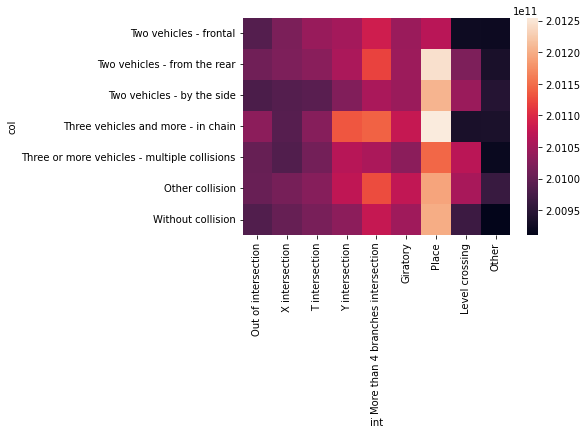

In [16]:
# visualization

pivot = dataset.pivot_table(
    index=["col"],
    columns=["int"],
    values="Num_Acc")
sns.heatmap(pivot)

#### Read Secondary Dataset

In [17]:
users = pd.read_csv('dataset/users.csv', encoding='latin1')
users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [18]:
users.columns[users.isna().sum() != 0]

Index(['place', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais'], dtype='object')

In [19]:
nans = users.isna()['secu'].sum() / users.shape[0]
nans

0.02316518346166455

In [20]:
users = users.dropna(subset = ['secu'], axis='rows')

In [21]:
users['grav'] = users['grav'].astype(str) 
users['grav'] = users['grav'].replace({'1': 'unscathed', '2': 'killed', '3': 'hospitalized', '4': 'light injury'})
users['grav'] = pd.Categorical(users['grav'], ['unscathed', 'light injury', 'hospitalized', 'killed'])

In [22]:
# Split Secu to two columns - type and if equipment was used and renaming them
users.loc[:, 'equipment_used'] = users.loc[:, 'secu'].values % 10

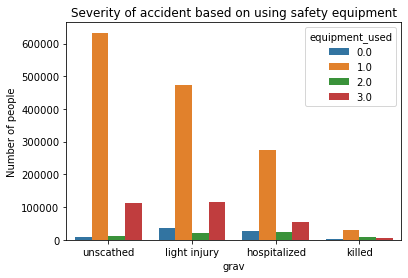

In [23]:
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=users)
ax.set_title('Severity of accident based on using safety equipment')
ax.set_ylabel('Number of people')
plt.show()

In [24]:
users['equipment_used'] = users['equipment_used'].replace(0,1)
users['equipment_used'] = users['equipment_used'].astype(int)
users['equipment_used'] = users['equipment_used'].astype(str) 
users['equipment_used'] = users['equipment_used'].replace({'1': 'yes', '2': 'no', '3': 'unknown'})

In [25]:
users.loc[:, 'secu'] = users.loc[:, 'secu'].values // 10
users['secu'] = users['secu'].replace(0,1)
users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,equipment_used
0,201600000001,1.0,1,unscathed,2,0.0,1.0,0.0,0.0,0.0,1983.0,B02,yes
1,201600000001,1.0,1,hospitalized,1,9.0,2.0,0.0,0.0,0.0,2001.0,A01,yes
2,201600000002,1.0,1,hospitalized,1,5.0,1.0,0.0,0.0,0.0,1960.0,A01,yes
3,201600000002,2.0,2,hospitalized,1,0.0,1.0,0.0,0.0,0.0,2000.0,A01,yes
4,201600000002,3.0,2,hospitalized,2,0.0,1.0,0.0,0.0,0.0,1962.0,A01,yes


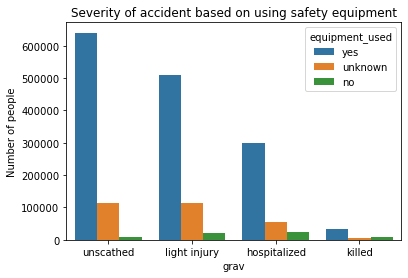

In [26]:
plt.clf()
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=users.sort_values(by='grav'))
ax.set_title('Severity of accident based on using safety equipment')
ax.set_ylabel('Number of people')
plt.show()

<Figure size 432x288 with 0 Axes>

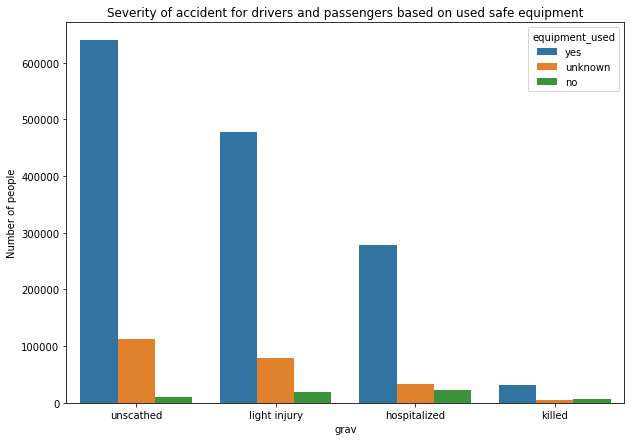

In [27]:
plt.clf()
plt.figure(figsize=(10,7))
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=users[(users['catu'] == 1) | (users['catu'] == 2)])
ax.set_title('Severity of accident for drivers and passengers based on used safe equipment')
ax.set_ylabel('Number of people')
plt.show()